# Assignment 1: Create a predictive model

- Given CPI for Feb, what would we expect movie ticket price to be?
- Not a new year’s price – but the estimate might still be interesting
- The prediction will be in the form of:
- If the CPI is 250 on Feb 1, 2018, what would we expect movie prices to be? (or on 2019-01-01?)

In [102]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import sympy as sym
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
import urllib3
import re
from bs4 import BeautifulSoup


# Visualization specifications
color = sns.color_palette()
plt.style.use('ggplot')
%matplotlib inline

# Warning message supression
warnings.simplefilter("ignore")

In [2]:
econ_df = pd.read_csv("/Users/danehamlett/Desktop/School/Big Data/CPIAUCSL.csv")
econ_df.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


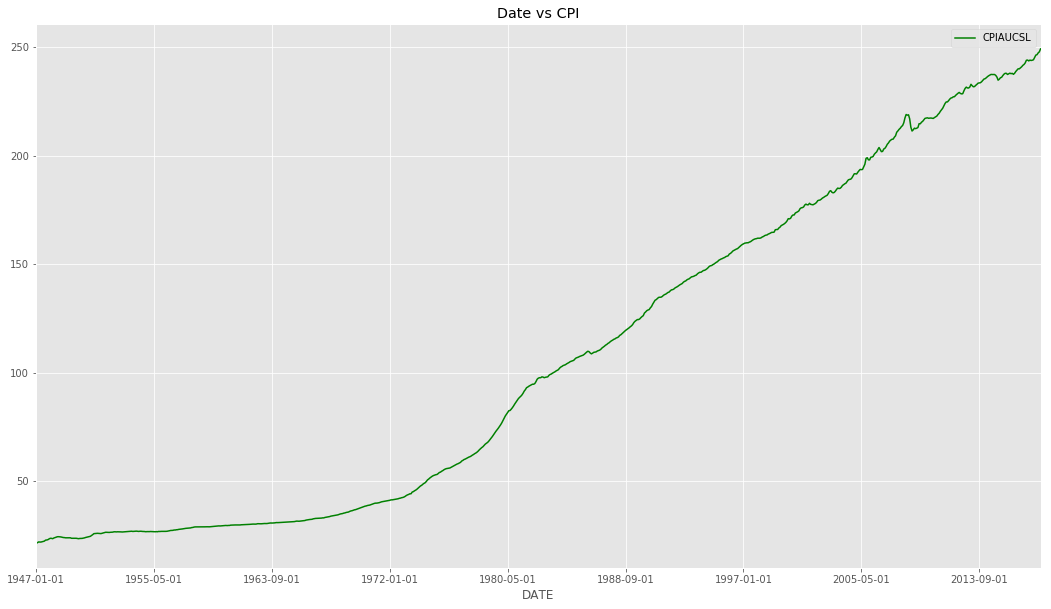

In [3]:
econ_df.plot.line(x='DATE', y='CPIAUCSL',figsize=(18,10),title='Date vs CPI',color='green')
plt.show()

In [4]:
econ_df['Year'] = econ_df['DATE'].str[:4].astype(int)
econ_df.head()

,DATE,CPIAUCSL,Year
0,1947-01-01,21.48,1947
1,1947-02-01,21.62,1947
2,1947-03-01,22.00,1947
3,1947-04-01,22.00,1947
4,1947-05-01,21.95,1947


In [5]:
simple_df = pd.DataFrame(econ_df.groupby(['Year'])['CPIAUCSL'].median().reset_index())
simple_df.columns.values[[1]] = ['CPI']
simple_df.head()

,Year,CPI
0,1947,22.155
1,1948,24.100
2,1949,23.830
3,1950,23.975
4,1951,25.925


In [6]:
movie_df = pd.read_csv("/Users/danehamlett/Desktop/School/Big Data/movie_tickets.csv")
movie_df.head()

,Year,Price
0,2017,8.97
1,2016,8.65
2,2015,8.43
3,2014,8.17
4,2013,8.13


In [7]:
final_df = pd.merge(movie_df, simple_df, on='Year', how='left')
final_df = final_df.drop('Year', axis=1)
final_df = final_df.sort_values('CPI', ascending = True).reset_index(drop=True)
final_df.head()

,Price,CPI
0,0.36,24.10
1,0.49,26.86
2,0.68,28.91
3,0.86,30.65
4,1.22,33.35


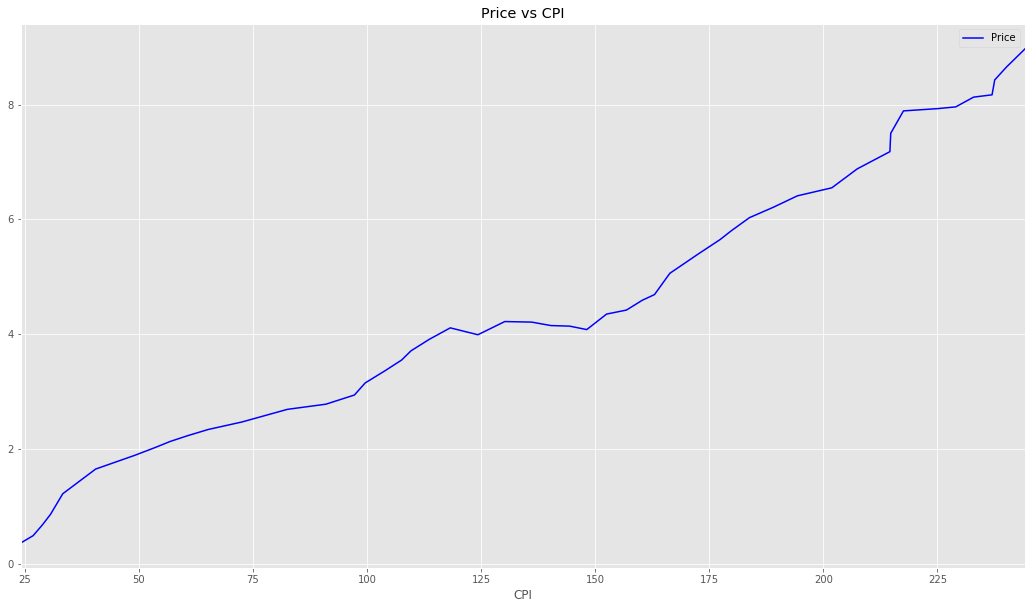

In [8]:
final_df.plot.line(x='CPI', y='Price',figsize=(18,10),title='Price vs CPI',color='blue')
plt.show()

In [9]:
result = smf.ols(formula = "Price ~ CPI", data = final_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1811.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):           8.98e-40
Time:                        12:54:55   Log-Likelihood:                -22.671
No. Observations:                  50   AIC:                             49.34
Df Residuals:                      48   BIC:                             53.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2563      0.125     -2.049      0.0

In [10]:
print(result.params)

Intercept   -0.256274
CPI          0.034701
dtype: float64


In [62]:
def movie_predict(x,y):
    cpi = x
    new_time = y
    prediction = round((result.params[1] * x) + result.params[0],2)
    print('With a known CPI of '+ str(x) + ', the predicted price of movie tickets on ' + y + ', would be approximately $' + 
          prediction.astype(str) + '.')

<p></p>
## Prediction # 1

In [63]:
movie_predict(250,'February 1, 2018')

With a known CPI of 250, the predicted price of movie tickets on February 1, 2018, would be approximately $8.42.


In [13]:
predictions = pd.DataFrame(result.predict())
final_df = pd.concat([final_df, predictions], axis=1)
final_df.columns.values[[2]] = ['Prediction']
final_df.head()

# predictions = result.predict()
# x = final_df['CPI']
# y = final_df['Price']

,Price,CPI,Prediction
0,0.36,24.10,0.580021
1,0.49,26.86,0.675796
2,0.68,28.91,0.746934
3,0.86,30.65,0.807313
4,1.22,33.35,0.901006


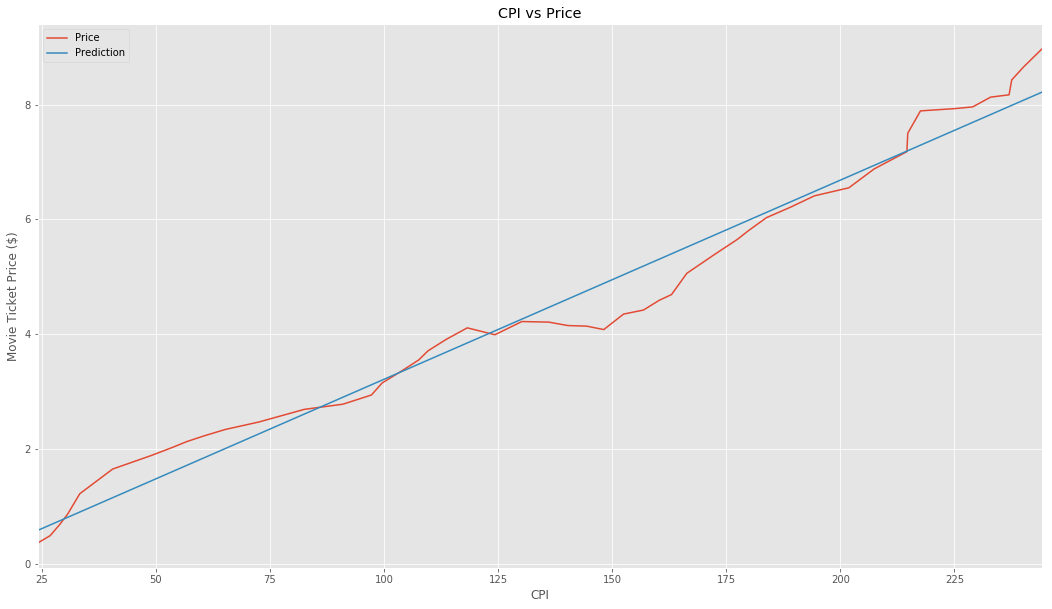

In [14]:
final_df.set_index('CPI').plot(figsize=(18,10), title = 'CPI vs Price', grid=True)
plt.ylabel('Movie Ticket Price ($)')
plt.show()

# plt.plot(1, .9130, marker='o', markersize=20, color='orange')
# plt.plot(2, .7826, marker='o', markersize=20, color='orange')

a = -0.001092810675 , b = 6.53841059006, c = -13035.1385732, d = 8659294.7732


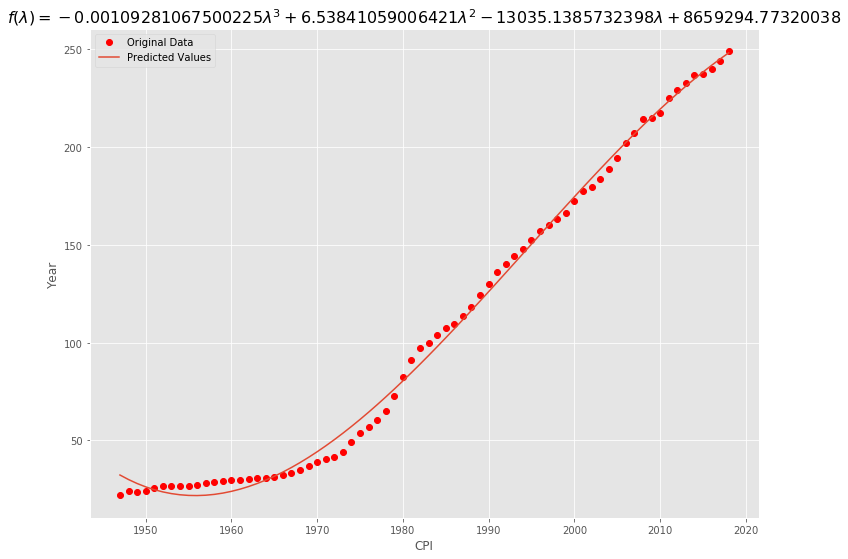

In [44]:
x = simple_df['Year']
y = simple_df['CPI']

"""
Plot data
"""

plt.plot(x, y, 'ro',label="Original Data")

x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

"""
Generate a function to fit the data. a, b, c and d are the coefficients
that align w/ the curve. 
"""

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

"""
Make the curve_fit
"""

popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""

print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

"""
Use sympy to generate the latex sintax of the function
"""

xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(figsize=(18,10))
plt.plot(x, func(x, *popt), label="Predicted Trend")
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 
plt.legend(loc='upper left')
plt.ylabel('Year')
plt.xlabel('CPI')
plt.show()

<p></p>
## Prediction # 2

In [67]:
a = 2019
b = round(popt[0]*a**3 + popt[1]*a**2 + popt[2]*a + popt[3],0)
date = 'January 1, 2019'
movie_predict(b, date)

With a known CPI of 251.0, the predicted price of movie tickets on January 1, 2019, would be approximately $8.45.


# Assignment 2: Create a Web Scraper

- Build a scraping script that scrapes the movie ticket prices and saves them

In [103]:
## Stop script with ctrl + c
url = 'http://www.natoonline.org/data/ticket-price/'
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data.decode('utf-8'),"html5lib")

## Create empty lists
years_list = []
prices_list = []

## Scrape page
years = soup.find_all('td', attrs={'class':'column-1'})
prices = soup.find_all('td', attrs={'class':'column-2'})

## Loop through HTML tags
for year in years:
    new_year = year.text.replace("*","")
    years_list.append(new_year)

for price in prices:
    new_price = price.text.replace("$","")
    prices_list.append(new_price)

## Create data frame
df_movie = pd.DataFrame(list(zip(years_list, prices_list)), columns=['Year','Price'])
df_movie['Date'] = datetime.date.today()
df_movie.head()

,Year,Price,Date
0,2017,8.97,2018-03-14
1,2016,8.65,2018-03-14
2,2015,8.43,2018-03-14
3,2014,8.17,2018-03-14
4,2013,8.13,2018-03-14
